In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-in-pakistan-2012-2021/Traffic Accidents in Pakistan.csv


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [14]:
# Load the dataset
df = pd.read_csv('/kaggle/input/road-accident-in-pakistan-2012-2021/Traffic Accidents in Pakistan.csv')



In [15]:
# Get an overview of the dataset
print(df.head())
print(df.info())

  Month - Year  Total Number of Accident  Accident Fatal  Accident Non-Fatal  \
0     Pakistan                       NaN             NaN                 NaN   
1    2012-2013                    8988.0          3884.0              5104.0   
2    2013-2014                    8359.0          3500.0              4859.0   
3    2014-2015                    7865.0          3214.0              4651.0   
4    2015-2016                    9100.0          3591.0              5509.0   

   Person Killed  Person Injured  Total Number of vehicles Involves  
0            NaN             NaN                                NaN  
1         4719.0          9710.0                             9876.0  
2         4348.0          9777.0                             9423.0  
3         3954.0          9661.0                             8949.0  
4         4448.0         11544.0                            10636.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 colum

In [16]:
# Check for missing values
print(df.isnull().sum())


Month - Year                         0
Total Number of Accident             6
Accident Fatal                       6
Accident Non-Fatal                   6
Person Killed                        6
Person Injured                       6
Total Number of vehicles Involves    6
dtype: int64


In [17]:
# Check data types
print(df.dtypes)

Month - Year                          object
Total Number of Accident             float64
Accident Fatal                       float64
Accident Non-Fatal                   float64
Person Killed                        float64
Person Injured                       float64
Total Number of vehicles Involves    float64
dtype: object


In [18]:
Q1 = df['Total Number of Accident'].quantile(0.25)
Q3 = df['Total Number of Accident'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Total Number of Accident'] >= Q1 - 1.5 * IQR) & (df['Total Number of Accident'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

* **Exploratory Data Analysis (EDA)**

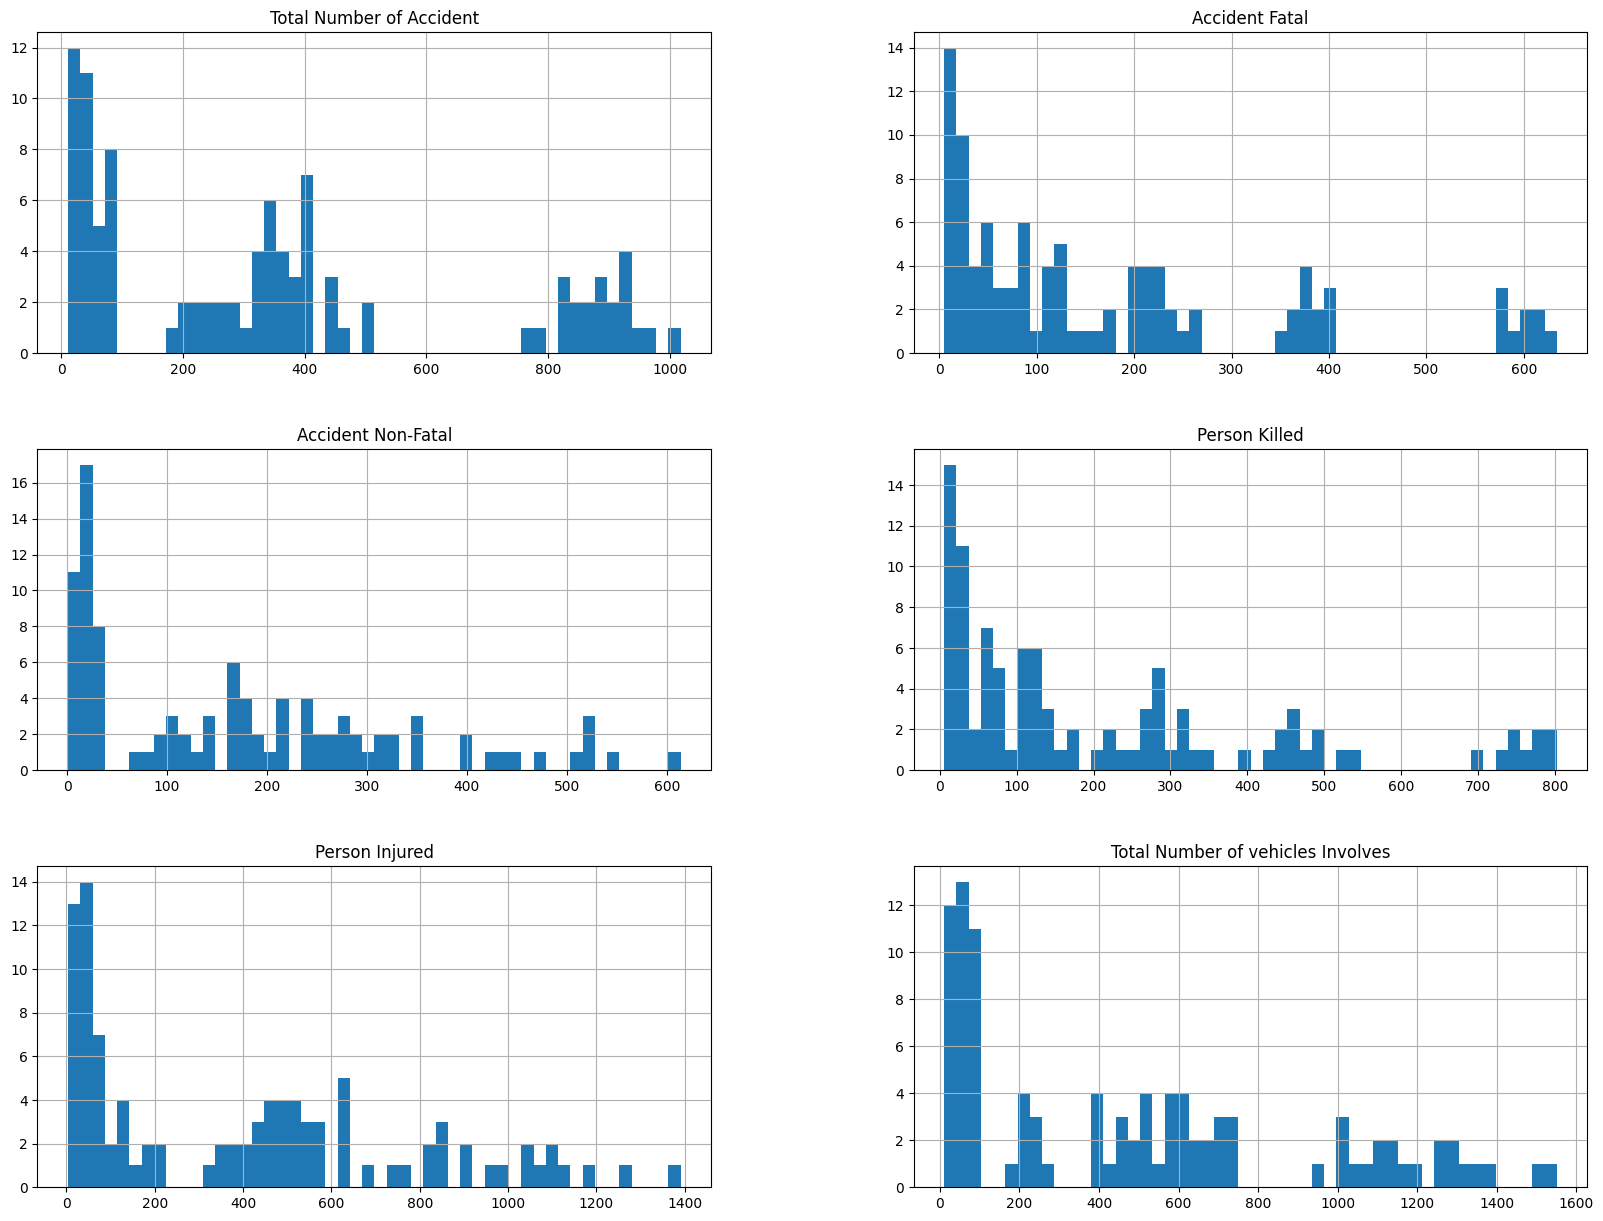

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numeric columns
df.hist(bins=50, figsize=(20,15))
plt.show()

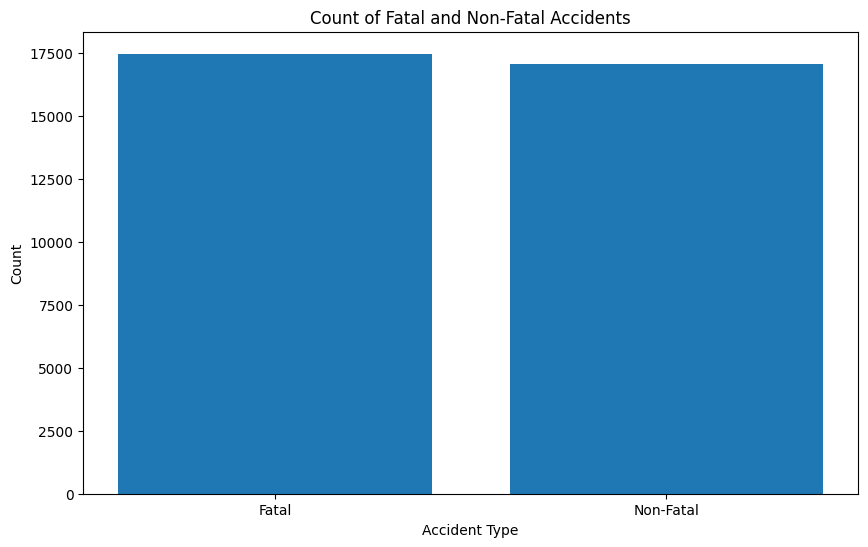

In [20]:
# Plotting the count of fatal and non-fatal accidents
plt.figure(figsize=(10,6))
plt.bar(['Fatal', 'Non-Fatal'], [df['Accident Fatal'].sum(), df['Accident Non-Fatal'].sum()])
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Count of Fatal and Non-Fatal Accidents')
plt.show()

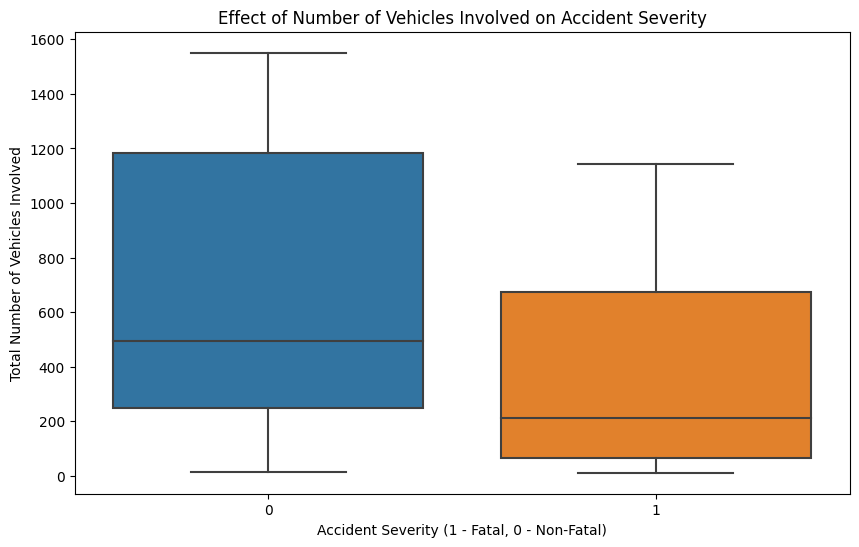

In [21]:
# Assuming 'Accident Severity' is a binary column where 1 represents fatal and 0 represents non-fatal
df['Accident Severity'] = np.where(df['Accident Fatal'] > df['Accident Non-Fatal'], 1, 0)

# Plotting the relationship between the number of vehicles involved and accident severity
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident Severity', y='Total Number of vehicles Involves', data=df)
plt.xlabel('Accident Severity (1 - Fatal, 0 - Non-Fatal)')
plt.ylabel('Total Number of Vehicles Involved')
plt.title('Effect of Number of Vehicles Involved on Accident Severity')
plt.show()

**Estimate of Deaths and Injury**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
X = df[['Person Killed', 'Person Injured']]
y_death = df['Person Killed']
y_injury = df['Person Injured']

In [24]:
X_train, X_test, y_death_train, y_death_test = train_test_split(X, y_death, test_size=0.2, random_state=42)
X_train, X_test, y_injury_train, y_injury_test = train_test_split(X, y_injury, test_size=0.2, random_state=42)

In [25]:
reg_death = LinearRegression()
reg_death.fit(X_train, y_death_train)

LinearRegression()

In [26]:
reg_injury = LinearRegression()
reg_injury.fit(X_train, y_injury_train)

LinearRegression()

In [27]:
y_death_pred = reg_death.predict(X_test)

In [28]:
y_injury_pred = reg_injury.predict(X_test)

In [29]:
mse_death = mean_squared_error(y_death_test, y_death_pred)
mae_death = mean_absolute_error(y_death_test, y_death_pred)

mse_injury = mean_squared_error(y_injury_test, y_injury_pred)
mae_injury = mean_absolute_error(y_injury_test, y_injury_pred)

print("Death Prediction - Mean Squared Error:", mse_death)
print("Death Prediction - Mean Absolute Error:", mae_death)

print("Injury Prediction - Mean Squared Error:", mse_injury)
print("Injury Prediction - Mean Absolute Error:", mae_injury)

Death Prediction - Mean Squared Error: 2.2651352032516134e-27
Death Prediction - Mean Absolute Error: 3.064215547965432e-14
Injury Prediction - Mean Squared Error: 1.8383338433953633e-26
Injury Prediction - Mean Absolute Error: 8.557599073810706e-14


In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the relevant columns for the classification model
X = df[['Person Killed', 'Person Injured']]
y = df['Accident Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier 3er4model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.85


In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the relevant columns for the classification model
X = df[['Person Killed', 'Person Injured']]  # Features
y = df['Accident Severity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier
clf = RandomForestClassifier(random_state=42)  # Set random state for reproducibility
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.85


In [32]:
# Interpretation of model results
print("Interpretation of Model Results:")
print("---------------------------------")
print("Deaths Prediction:")
print("   Intercept: {:.2f}".format(reg_death.intercept_))
print("   Coefficients: ", reg_death.coef_)
print("\nInjuries Prediction:")
print("   Intercept: {:.2f}".format(reg_injury.intercept_))
print("   Coefficients: ", reg_injury.coef_)

# Generate strategies and policy recommendations based on the findings
strategies = [
    "Increase road safety awareness campaigns to educate people about the risks and consequences of road accidents.",
    "Improve traffic enforcement measures, such as increasing police presence and enforcing stricter penalties for traffic violations.",
     "Enhance road infrastructure, including better road design, maintenance, and implementation of safety measures (e.g., speed limits, traffic signs, signals).",
    "Promote public transportation options to reduce the number of vehicles on the road and minimize traffic congestion.",
    "Strengthen driver training and licensing programs to ensure that drivers are well-prepared and knowledgeable about traffic rules and safety practices.",
    "Implement stricter regulations for vehicle safety standards and regular inspections to ensure that vehicles are roadworthy.",
    "Foster collaboration between relevant stakeholders, including government agencies, law enforcement, transportation authorities, and community organizations, to address road safety challenges collectively.",
    "Continuously monitor and evaluate the effectiveness of implemented strategies, making adjustments and improvements as needed."
]

# Print the strategies and policy recommendations
print("\nStrategies and Policy Recommendations to Reduce Accidents:")
print("-------------------------------------------------------")
for i, strategy in enumerate(strategies):
    print("{}. {}".format(i+1, strategy))

Interpretation of Model Results:
---------------------------------
Deaths Prediction:
   Intercept: 0.00
   Coefficients:  [ 1.000000e+00 -8.273319e-17]

Injuries Prediction:
   Intercept: 0.00
   Coefficients:  [7.31026903e-16 1.00000000e+00]

Strategies and Policy Recommendations to Reduce Accidents:
-------------------------------------------------------
1. Increase road safety awareness campaigns to educate people about the risks and consequences of road accidents.
2. Improve traffic enforcement measures, such as increasing police presence and enforcing stricter penalties for traffic violations.
3. Enhance road infrastructure, including better road design, maintenance, and implementation of safety measures (e.g., speed limits, traffic signs, signals).
4. Promote public transportation options to reduce the number of vehicles on the road and minimize traffic congestion.
5. Strengthen driver training and licensing programs to ensure that drivers are well-prepared and knowledgeable abo